# Installing graph-tool (https://graph-tool.skewed.de)

---


To import a library that's not in Colaboratory by default, you can use `!apt-get install`.

But since graph-tool is not in the official repository, we need to add it to the list.

In [ ]:
!mkdir -p /etc/apt/keyrings; mkdir -p ~/.gnupg; chmod 700 ~/.gnupg
!gpg --no-default-keyring --keyring /etc/apt/keyrings/skewed.de.gpg --keyserver keyserver.ubuntu.com --recv-keys 612DEFB798507F25
!echo "deb [signed-by=/etc/apt/keyrings/skewed.de.gpg] https://downloads.skewed.de/apt $(lsb_release -s -c) main" > /etc/apt/sources.list.d/skewed.list
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

gpg: keybox '/etc/apt/keyrings/skewed.de.gpg' created
gpg: /root/.gnupg/trustdb.gpg: trustdb created
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://downloads.skewed.de/apt jammy InRelease [7,535 B]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu ja

In [ ]:
# Colab uses a Python install that deviates from the system's! Bad colab! We need some workarounds.
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 45 not upgraded.
After this operation, 310 kB disk space will be freed.
(Reading database ... 130125 files and directories currently installed.)
Removing python3-cairo:amd64 (1.20.1-3build1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev

# Now we can use graph-tool as any other Python module



In [ ]:
from graph_tool.all import *

g = collection.data["celegansneural"]
state = minimize_nested_blockmodel_dl(g)

# Inline drawing works too!

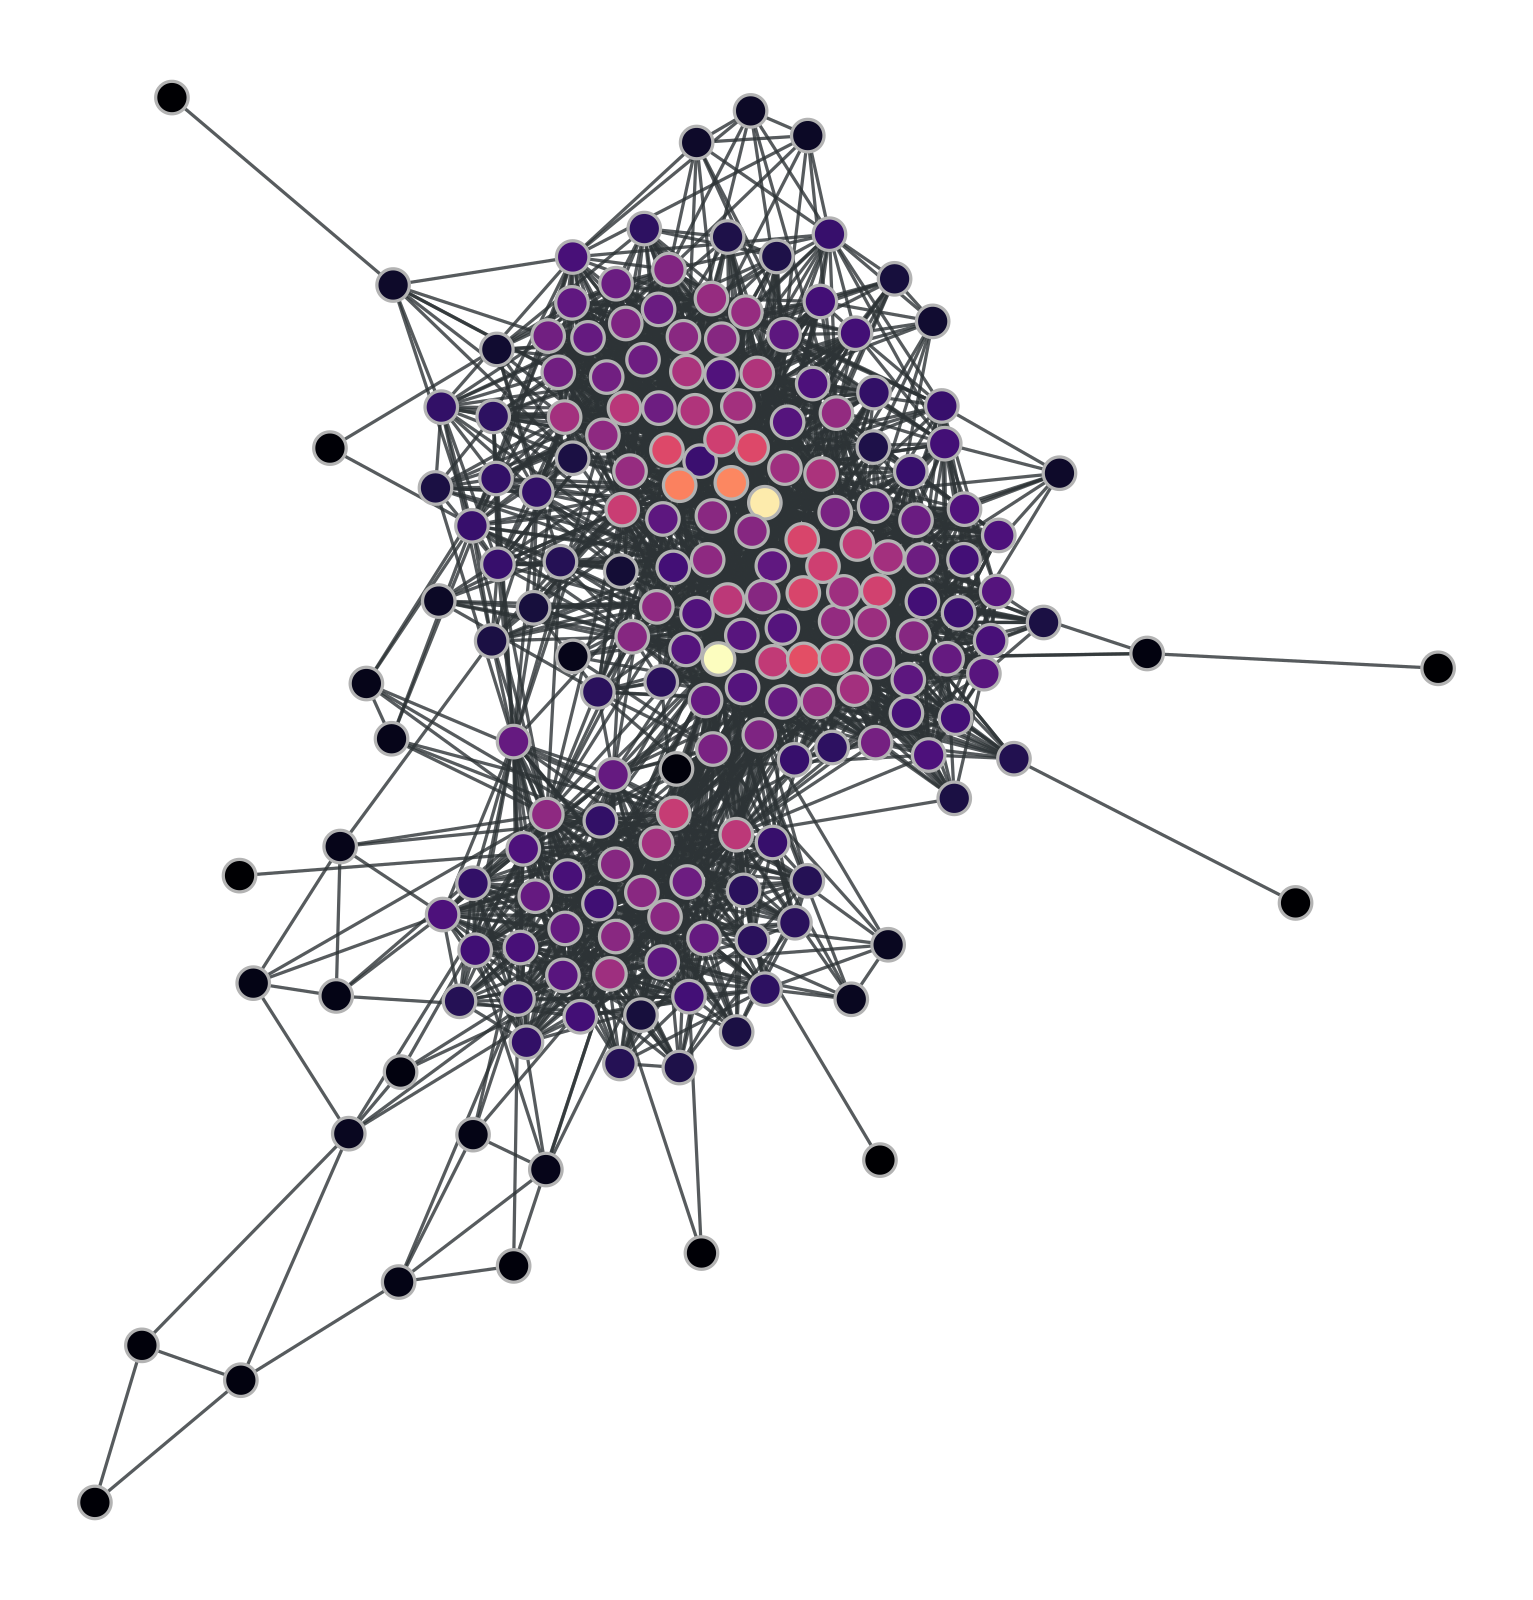

Grado del vértice 0: 23, Promedio de vecinos más cercanos: 41.82608695652174
Grado del vértice 1: 21, Promedio de vecinos más cercanos: 49.76190476190476
Grado del vértice 2: 29, Promedio de vecinos más cercanos: 38.10344827586207
Grado del vértice 3: 43, Promedio de vecinos más cercanos: 39.604651162790695
Grado del vértice 4: 12, Promedio de vecinos más cercanos: 34.75
Grado del vértice 5: 23, Promedio de vecinos más cercanos: 42.52173913043478
Grado del vértice 6: 96, Promedio de vecinos más cercanos: 36.927083333333336
Grado del vértice 7: 20, Promedio de vecinos más cercanos: 36.4
Grado del vértice 8: 26, Promedio de vecinos más cercanos: 39.42307692307692
Grado del vértice 9: 42, Promedio de vecinos más cercanos: 41.23809523809524
Grado del vértice 10: 40, Promedio de vecinos más cercanos: 44.3
Grado del vértice 11: 46, Promedio de vecinos más cercanos: 44.47826086956522
Grado del vértice 12: 60, Promedio de vecinos más cercanos: 40.53333333333333
Grado del vértice 13: 49, Promed

In [ ]:
import graph_tool.all as gt

# Cargamos la red de colaboración de jazz
g = gt.collection.ns["jazz_collab"]

# Análisis de la red
# Obtener el grado de cada vértice
vertex_degrees = g.degree_property_map("out")

# Crear un diccionario para almacenar el promedio de vecinos más cercanos para cada grado de vértice
knn_avg = {}

# Calcular el promedio de vecinos más cercanos para cada grado de vértice
for v in g.vertices():
    neighbors = list(v.all_neighbors())
    knn_avg[v] = sum(vertex_degrees[n] for n in neighbors) / len(neighbors) if neighbors else 0

# Visualización de la red
pos = gt.sfdp_layout(g)  # Algoritmo de posicionamiento para visualización

# Dibujar la red
gt.graph_draw(g, pos=pos, output_size=(800, 800), vertex_fill_color=vertex_degrees, vertex_color=[0.7, 0.7, 0.7, 1])

# Mostrar los resultados
# Por ejemplo, podemos imprimir el promedio de vecinos más cercanos para cada grado de vértice
for v in g.vertices():
    print(f"Grado del vértice {v}: {vertex_degrees[v]}, Promedio de vecinos más cercanos: {knn_avg[v]}")


Número de comunidades: 198


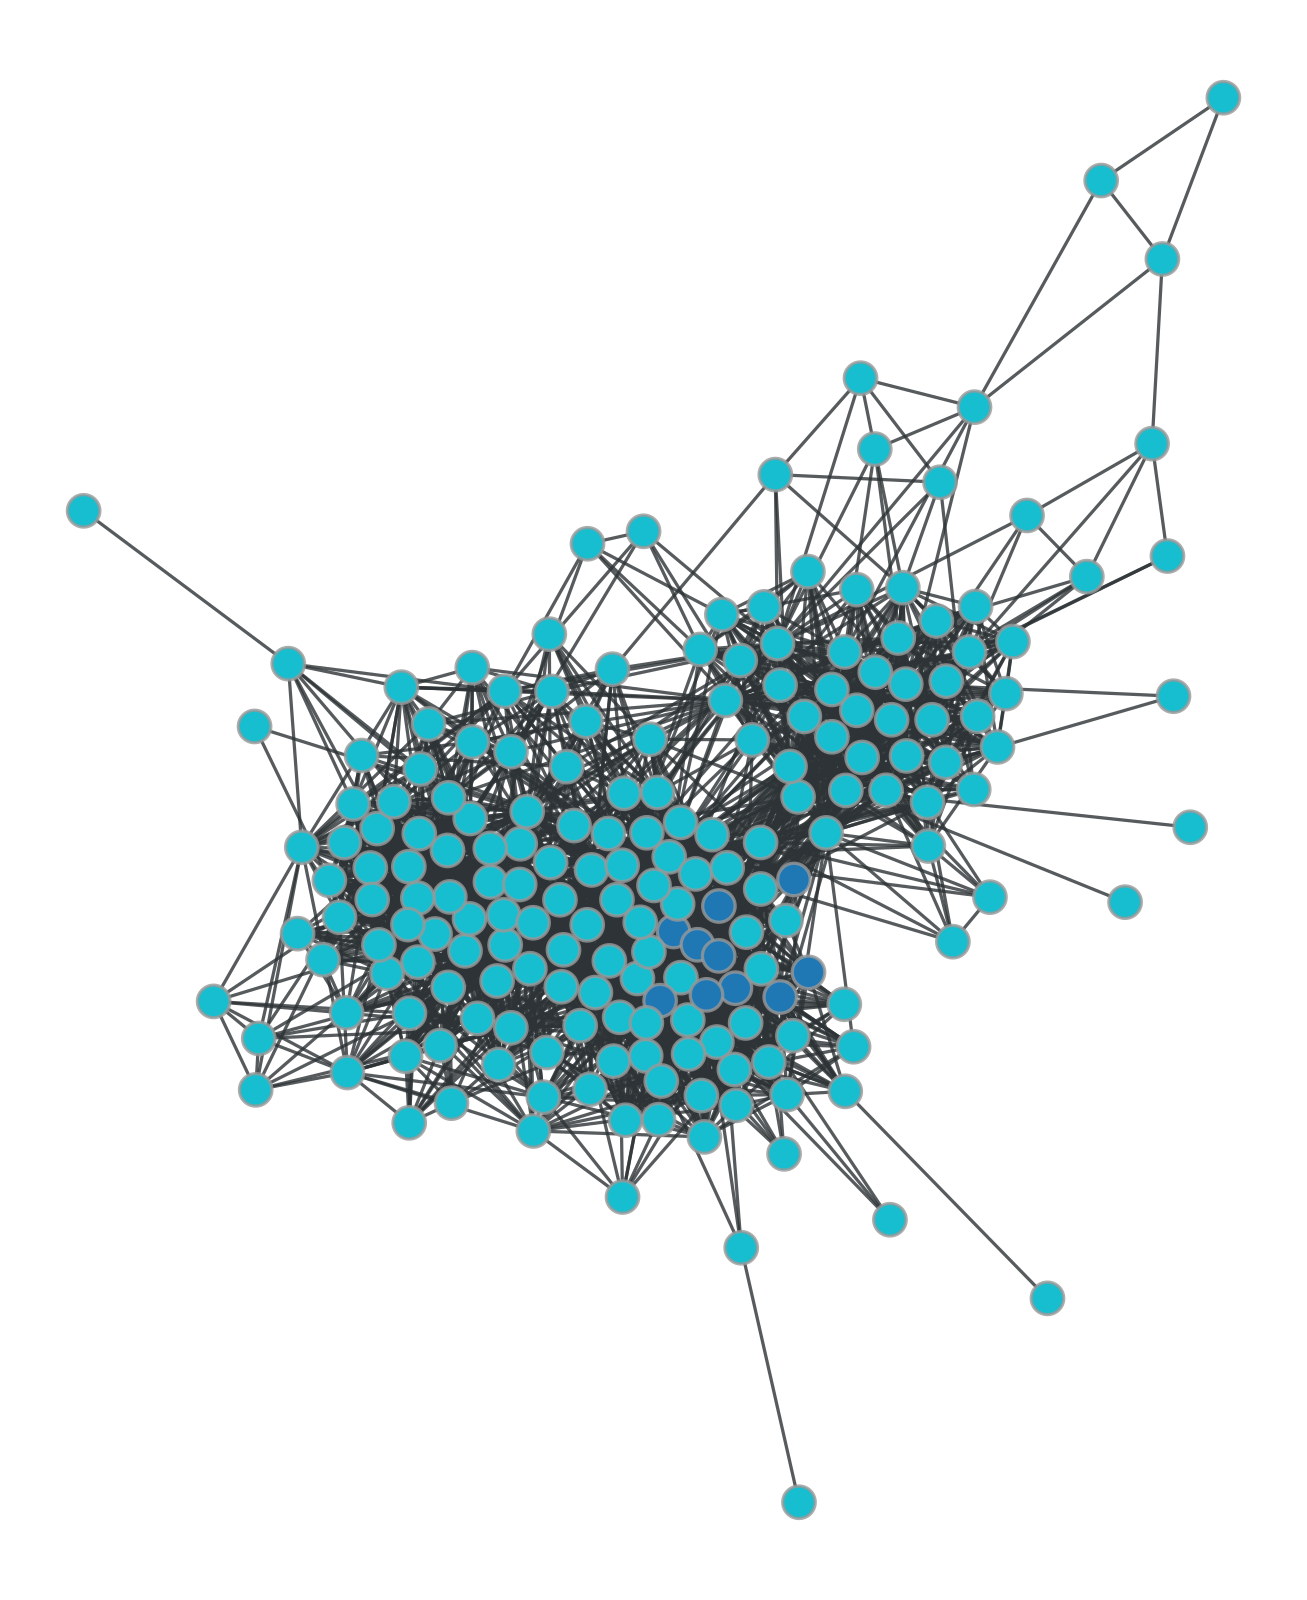

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe71d973250, at 0x7fe6cc4e0640>

In [ ]:
import graph_tool.all as gt
import numpy as np
import matplotlib.pyplot as plt

# Cargamos la red de colaboración de jazz
g = gt.collection.ns["jazz_collab"]

# Detectar comunidades utilizando el algoritmo de Louvain
state = gt.minimize_nested_blockmodel_dl(g)

# Obtener el número de comunidades
num_communities = state.levels[0].get_B()
print("Número de comunidades:", num_communities)

# Colormap para asignar un color único a cada comunidad
cmap = plt.get_cmap("tab10")

# Convertir las asignaciones de comunidades a colores hexadecimales
vertex_colors = [cmap(i % num_communities) for i in state.levels[0].get_blocks()]

# Visualización de la red con colores de comunidad
pos = gt.sfdp_layout(g)  # Algoritmo de posicionamiento para visualización

# Crear una propiedad de vértices para almacenar los colores
vertex_color_property = g.new_vertex_property("vector<double>")
for v, color in zip(g.vertices(), vertex_colors):
    vertex_color_property[v] = color

# Dibujar la red con colores de comunidad
gt.graph_draw(g, pos=pos, output_size=(800, 800), vertex_fill_color=vertex_color_property)
